# Submission Kelas "Belajar Machine Learning untuk Pemula"

# Nama : Gregorius Ivan Sebastian

# Domisili : Kota Tangerang Selatan, Banten

# Email: ivansebastian60@gmail.com

In [1]:
# importing necessary libraries
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Importing necessary dataset for submission from dicoding academy
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rock_paper_scissors.zip


--2020-10-27 14:40:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  12.4MB/s    in 29s     

2020-10-27 14:41:29 (10.7 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [3]:
# Extract files from zip and divide based on training and validation
import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Remove the 'rps-cv-images' directory and all its contents and deleting 'README_rpc-cv-images.txt'
# Becayse those two things aren't necessary
import shutil
base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


In [4]:
IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS = 150, 150, 3

datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    vertical_flip= True,
                    shear_range = 0.2,
                    zoom_range=0.4,
                    fill_mode = 'nearest',
                    validation_split = 0.4)
 
train_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT), 
        # batch_size=BATCH_SIZE,
        color_mode='rgb',
        class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        # batch_size=BATCH_SIZE,
        color_mode='rgb',
        shuffle=True,
        class_mode='sparse',
        subset='validation')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [10]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, LeakyReLU

INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, COLOR_CHANNELS)


# Inisialisasi model
cnn = models.Sequential()

# 1st Convolutional Layer
cnn.add(Conv2D(32, (3,3), activation='relu', 
    input_shape=INPUT_SHAPE))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# 2nd Convolutional Layer
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# 3rd Convolutional Layer
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# 4th Convolutional Layer
cnn.add(Conv2D(256, (3,3), activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Fully Connected Layer and Output Layer
cnn.add(Flatten(input_shape=INPUT_SHAPE)) 
cnn.add(Dense(256, activation=LeakyReLU(alpha=0.3)))
cnn.add(Dense(256, activation=LeakyReLU(alpha=0.3)))  
cnn.add(Dropout(0.5)) 
cnn.add(Dense(512, activation=LeakyReLU(alpha=0.3))) 
cnn.add(Dropout(0.3)) 
cnn.add(Dense(3, activation="softmax"))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)      

In [11]:
# Callback EarlyStopping dan History
from keras.callbacks import EarlyStopping, History

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

history = History()

cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# batch is based on online forum advice
cnn.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs= 20,
      validation_data=validation_generator, 
      validation_steps=validation_generator.n//validation_generator.batch_size,  
      callbacks=[earlystop, history],
      verbose=2)

Epoch 1/20
41/41 - 15s - loss: 1.0801 - accuracy: 0.3807 - val_loss: 0.8641 - val_accuracy: 0.6539
Epoch 2/20
41/41 - 14s - loss: 0.7136 - accuracy: 0.7137 - val_loss: 0.4869 - val_accuracy: 0.8148
Epoch 3/20
41/41 - 14s - loss: 0.4798 - accuracy: 0.8110 - val_loss: 0.4474 - val_accuracy: 0.8252
Epoch 4/20
41/41 - 14s - loss: 0.4382 - accuracy: 0.8270 - val_loss: 0.3540 - val_accuracy: 0.8796
Epoch 5/20
41/41 - 14s - loss: 0.4214 - accuracy: 0.8385 - val_loss: 0.4356 - val_accuracy: 0.8507
Epoch 6/20
41/41 - 14s - loss: 0.4209 - accuracy: 0.8385 - val_loss: 0.3016 - val_accuracy: 0.8866
Epoch 7/20
41/41 - 14s - loss: 0.3355 - accuracy: 0.8713 - val_loss: 0.2467 - val_accuracy: 0.9005
Epoch 8/20
41/41 - 14s - loss: 0.3077 - accuracy: 0.8853 - val_loss: 0.2882 - val_accuracy: 0.8819
Epoch 9/20
41/41 - 14s - loss: 0.2282 - accuracy: 0.9228 - val_loss: 0.2032 - val_accuracy: 0.9317
Epoch 10/20
41/41 - 14s - loss: 0.2134 - accuracy: 0.9353 - val_loss: 0.2364 - val_accuracy: 0.9259
Epoch 11/

Saving Paper test.jpeg to Paper test (1).jpeg


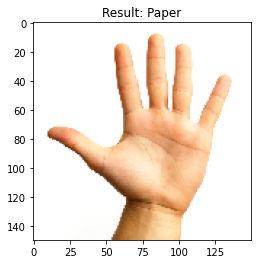

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(IMG_WIDTH,IMG_HEIGHT))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])

  resultProb = cnn.predict(images) 
  resultLabel = resultProb.argmax(axis=-1)

  # printing images based on class
  if resultLabel == 0:
    plt.title("Result: Paper")
  elif resultLabel == 1:
    plt.title("Result: Rock")
  elif resultLabel == 2:
    plt.title("Result: Scissor")
